In [1]:
titanic <- read.csv("titanic3.csv")

In [2]:
head(titanic)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [3]:
str(titanic)

'data.frame':	1309 obs. of  14 variables:
 $ pclass   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived : int  1 1 0 0 0 1 1 0 1 0 ...
 $ name     : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 22 24 25 26 27 31 46 47 51 55 ...
 $ sex      : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ age      : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp    : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch    : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket   : Factor w/ 929 levels "110152","110413",..: 188 50 50 50 50 125 93 16 77 826 ...
 $ fare     : num  211 152 152 152 152 ...
 $ cabin    : Factor w/ 187 levels "","A10","A11",..: 45 81 81 81 81 151 147 17 63 1 ...
 $ embarked : Factor w/ 4 levels "","C","Q","S": 4 4 4 4 4 4 4 4 4 2 ...
 $ boat     : Factor w/ 28 levels "","1","10","11",..: 13 4 1 1 1 14 3 1 28 1 ...
 $ body     : int  NA NA NA 135 NA NA NA NA NA 22 ...
 $ home.dest: Factor w/ 370 levels "","?Havana, Cuba",..: 310 232 232 232 232 238 163 25 23 230 ...


In [4]:
titanic$survived <- factor(titanic$survived, levels = c(0, 1), labels = c("dead", "survived"))

In [5]:
titanic$pclass <- as.factor(titanic$pclass)

In [6]:
titanic$name <- as.character(titanic$name)
titanic$ticket <- as.character(titanic$ticket)
titanic$cabin <- as.character(titanic$cabin)

In [7]:
levels(titanic$embarked)

[1] ""  "C" "Q" "S"

In [8]:
table(titanic$embarked)


      C   Q   S 
  2 270 123 914 

In [9]:
levels(titanic$embarked)[1] <- NA
levels(titanic$embarked)

[1] "C" "Q" "S"

In [10]:
table(titanic$embarked)


  C   Q   S 
270 123 914 

In [11]:
table(titanic$embarked, useNA = "always")


   C    Q    S <NA> 
 270  123  914    2 

In [12]:
titanic$cabin <- ifelse(titanic$cabin == "", NA, titanic$cabin)

In [13]:
titanic <- titanic[, !names(titanic) %in% c("boat", "body", "home.dest")]

In [14]:
library(caret)
set.seed(137)
test_idx <- createDataPartition(titanic$survived, p = 0.1)$Resample1

Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [15]:
titanic.test <- titanic[test_idx, ]
titanic.train <- titanic[-test_idx, ]

In [16]:
NROW(titanic.test)

[1] 131

In [17]:
prop.table(table(titanic.test$survived))


     dead  survived 
0.6183206 0.3816794 

In [18]:
NROW(titanic.train)

[1] 1178

In [19]:
prop.table(table(titanic.train$survived))


     dead  survived 
0.6179966 0.3820034 

In [20]:
save(titanic, titanic.test, titanic.train, file = "titanic.RData")

In [21]:
createFolds(titanic.train$survived, k = 10)

$Fold01
  [1]   13   23   27   30   36   42   49   62   67  116  126  139  146  148  150
 [16]  157  161  176  189  229  230  247  264  268  271  277  314  318  321  325
 [31]  335  337  362  380  404  407  408  425  428  430  455  456  466  471  473
 [46]  474  476  477  479  532  536  550  553  557  565  566  575  594  596  628
 [61]  646  697  703  718  734  743  758  764  770  797  808  827  835  841  861
 [76]  864  869  871  877  880  882  883  891  914  925  927  929  940  941  942
 [91]  965  983  993  999 1011 1017 1018 1023 1026 1045 1059 1060 1066 1071 1074
[106] 1088 1092 1098 1104 1113 1115 1132 1133 1134 1139 1141 1143 1149

$Fold02
  [1]    8   24   31   39   41   66  106  107  109  110  112  121  140  151  159
 [16]  160  169  180  184  210  215  258  262  296  300  306  317  343  364  367
 [31]  368  373  398  400  402  410  418  435  440  449  482  488  492  494  502
 [46]  505  525  527  530  541  544  572  588  593  598  604  605  606  612  621
 [61]  632  645  660  666  681  691  699  706  708  711  740  773  783  785  786
 [76]  805  814  816  840  846  852  859  897  900  904  943  949  951  956  962
 [91]  968  974  975  987 1003 1015 1027 1031 1043 1082 1090 1093 1096 1099 1103
[106] 1105 1109 1112 1123 1124 1125 1127 1131 1150 1153 1157 1160 1164

$Fold03
  [1]   11   16   29   44   50   59   64   82   87   98  108  117  123  125  130
 [16]  134  138  163  166  186  188  194  219  225  227  240  242  245  254  256
 [31]  257  266  267  269  273  274  282  294  311  315  324  354  378  379  390
 [46]  392  412  441  446  469  470  483  501  506  514  538  551  563  568  578
 [61]  580  584  603  608  613  640  642  648  663  667  670  676  680  696  701
 [76]  713  724  727  730  733  737  739  765  787  803  831  845  857  862  873
 [91]  876  879  884  938  980  989 1000 1008 1009 1020 1028 1035 1039 1055 1056
[106] 1058 1079 1091 1095 1106 1111 1114 1116 1118 1119 1128 1173

$Fold04
  [1]    5   17   20   26   37   38   45   51   57  102  104  120  128  136  145
 [16]  155  156  164  170  177  185  198  202  205  216  222  223  248  253  280
 [31]  285  292  293  295  298  319  326  329  339  341  346  353  365  385  405
 [46]  422  439  457  459  481  507  508  522  569  570  573  581  590  601  624
 [61]  627  629  633  637  639  654  655  661  669  678  683  685  687  689  704
 [76]  735  746  749  750  751  757  759  761  768  774  775  776  801  807  818
 [91]  832  849  851  855  858  875  902  907  921  933  937  954  955  958  972
[106]  976 1024 1030 1038 1044 1063 1068 1072 1129 1147 1162 1176 1177

$Fold05
  [1]    4   40   60   70   71   77   81   86   89   93  100  105  118  129  131
 [16]  147  149  153  175  181  197  200  212  217  220  221  250  281  289  291
 [31]  302  331  345  347  348  356  358  359  363  374  384  386  391  399  406
 [46]  409  411  423  434  462  472  480  503  511  528  534  535  539  554  559
 [61]  562  583  611  614  617  619  626  643  647  649  651  668  671  684  707
 [76]  715  717  729  753  755  756  760  766  777  779  788  791  802  815  817
 [91]  823  850  854  866  874  888  896  906  923  924  930  947  948  959  969
[106]  978  991  997 1001 1016 1019 1054 1076 1080 1084 1122 1152 1174

$Fold06
  [1]    2   15   21   34   46   53   79   80   90   91   96  103  113  135  141
 [16]  182  191  192  196  201  208  241  249  263  275  307  308  313  322  327
 [31]  336  352  360  371  372  382  394  416  419  433  443  444  451  453  458
 [46]  463  464  468  487  489  493  495  524  533  537  545  558  561  564  586
 [61]  589  592  595  615  630  641  652  656  679  686  698  700  702  714  741
 [76]  763  778  800  820  826  830  836  839  847  886  895  911  915  936  953
 [91]  966  967  981  982  986 1005 1014 1022 1025 1033 1034 1037 1046 1047 1049
[106] 1062 1078 1081 1097 1100 1101 1108 1146 1156 1158 1159 1161 1172

$Fold07
  [1]    9   14   35   83   84   88  124  127  154  162  167  174  178  179  203
 [16]  204  235  238  259  270  28

In [22]:
create_ten_fold_cv <- function() {
    set.seed(137)
    lapply(createFolds(titanic.train$survived, k = 10), function(idx) {
        return(list(train = titanic.train[-idx, ],
                   validation = titanic.train[idx, ]))
    })
}

x <- create_ten_fold_cv()
str(x)

List of 10
 $ Fold01:List of 2
  ..$ train     :'data.frame':	1060 obs. of  11 variables:
  .. ..$ pclass  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ survived: Factor w/ 2 levels "dead","survived": 2 1 1 1 2 2 1 1 2 2 ...
  .. ..$ name    : chr [1:1060] "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" "Allison, Mrs. Hudson J C (Bessie Waldo Daniels)" ...
  .. ..$ sex     : Factor w/ 2 levels "female","male": 2 1 2 1 2 1 2 2 1 2 ...
  .. ..$ age     : num [1:1060] 0.92 2 30 25 48 63 39 71 26 80 ...
  .. ..$ sibsp   : int [1:1060] 1 1 1 1 0 1 0 0 0 0 ...
  .. ..$ parch   : int [1:1060] 2 2 2 2 0 0 0 0 0 0 ...
  .. ..$ ticket  : chr [1:1060] "113781" "113781" "113781" "113781" ...
  .. ..$ fare    : num [1:1060] 151.6 151.6 151.6 151.6 26.6 ...
  .. ..$ cabin   : chr [1:1060] "C22 C26" "C22 C26" "C22 C26" "C22 C26" ...
  .. ..$ embarked: Factor w/ 3 levels "C","Q","S": 3 3 3 3 3 3 3 1 3 3 ...
  ..$ validation:'d

In [23]:
head(x$Fold01$train)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
2,1,survived,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
3,1,dead,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
4,1,dead,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
5,1,dead,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
6,1,survived,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
7,1,survived,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S


In [24]:
library(Hmisc)
data <- create_ten_fold_cv()[[1]]$train

Warning message:
"package 'Hmisc' was built under R version 3.6.2"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.2"
Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



In [25]:
summary(survived ~ pclass + sex + age + sibsp + parch + fare + embarked, 
       data = data, method = "reverse")



Descriptive Statistics by survived

+------------+----+-----------------------+-----------------------+
|            |N   |dead                   |survived               |
|            |    |(N=655)                |(N=405)                |
+------------+----+-----------------------+-----------------------+
|pclass : 1  |1060|       15%  ( 99)      |       40%  (163)      |
+------------+----+-----------------------+-----------------------+
|    2       |    |       20%  (131)      |       23%  ( 93)      |
+------------+----+-----------------------+-----------------------+
|    3       |    |       65%  (425)      |       37%  (149)      |
+------------+----+-----------------------+-----------------------+
|sex : male  |1060|       85%  (557)      |       34%  (137)      |
+------------+----+-----------------------+-----------------------+
|age         | 843|   21.00/28.00/39.25   |   19.00/27.00/36.00   |
+------------+----+-----------------------+-----------------------+
|sibsp : 0

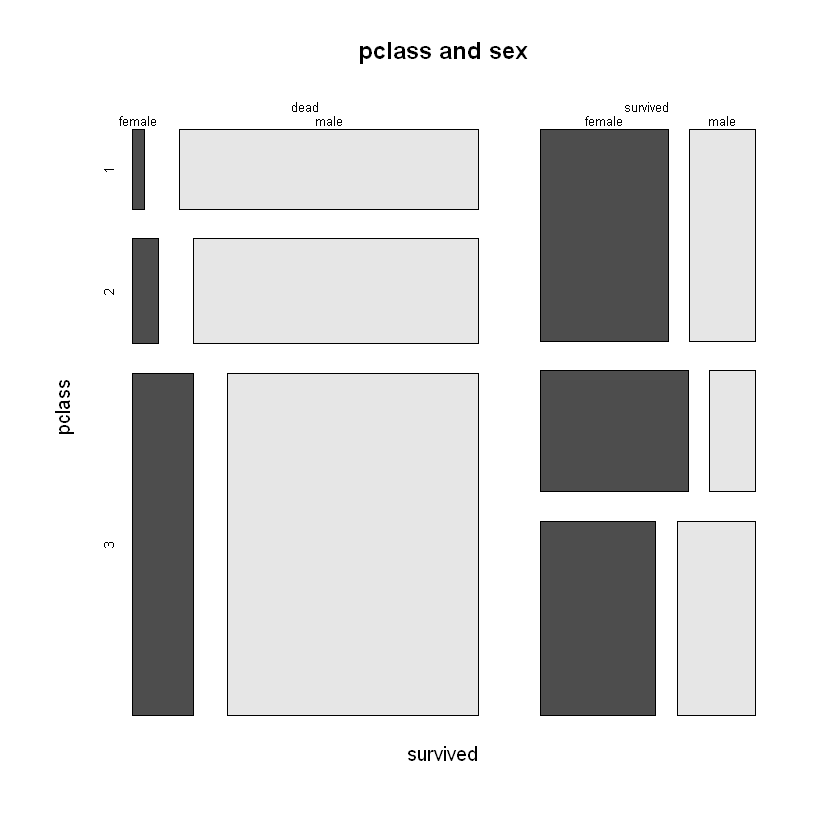

In [26]:
mosaicplot(survived ~ pclass + sex, data = data, color = TRUE, main = "pclass and sex")

In [27]:
xtabs(~ sex + pclass, data = data)

        pclass
sex        1   2   3
  female 112  82 172
  male   150 142 402

In [28]:
xtabs(survived == "survived" ~ sex + pclass, data = data)

        pclass
sex        1   2   3
  female 108  71  89
  male    55  22  60

In [29]:
xtabs(survived == "survived" ~ sex + pclass, data = data) / xtabs(~ sex + pclass, data = data)

        pclass
sex              1         2         3
  female 0.9642857 0.8658537 0.5174419
  male   0.3666667 0.1549296 0.1492537

In [30]:
data.complete <- data[complete.cases(data), ]

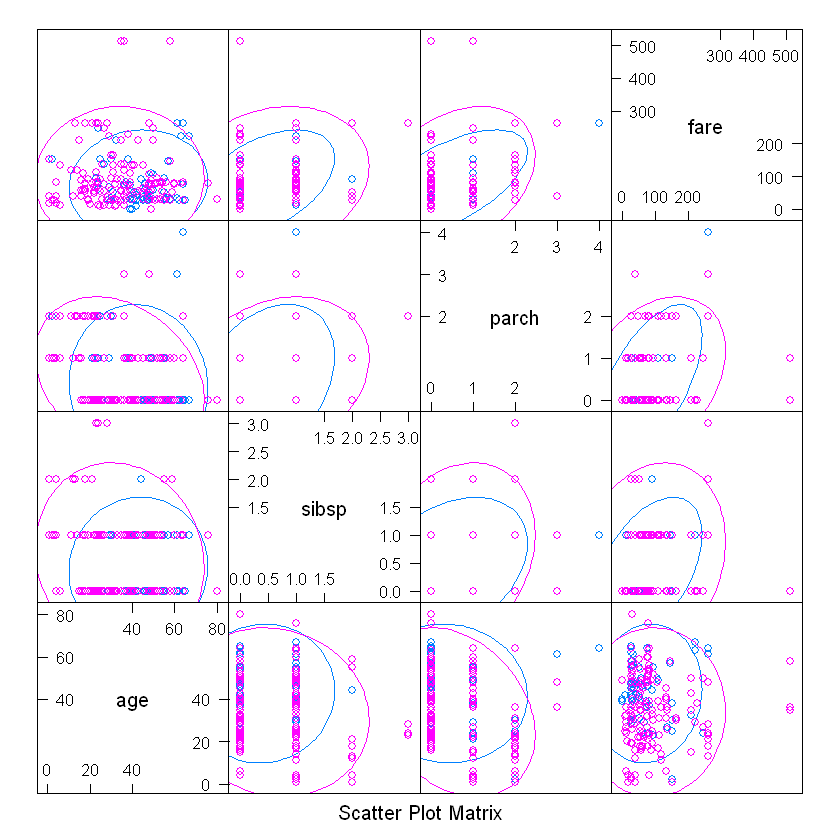

In [31]:
featurePlot(data.complete[ ,
                          sapply(names(data.complete),
                                function(n) {is.numeric(data.complete [, n])})],
            data.complete[ , c("survived")],
            "ellipse"
)

In [32]:
library(rpart)
m <- rpart(survived ~ pclass + sex + age + sibsp + parch + fare + embarked, 
          data = titanic.train)
p <- predict(m, newdata = titanic.train, type = "class")
head(p)

Warning message:
"package 'rpart' was built under R version 3.6.2"

2        3        4        5        6        7 
survived survived     dead survived     dead survived 
Levels: dead survived

In [33]:
library(foreach)
folds <- create_ten_fold_cv()

rpart_result <- foreach(f=folds) %do% {
    model_rpart <- rpart(survived ~ pclass + sex + age + sibsp + parch + fare + embarked,
                        data = f$train)
    predicted <- predict(model_rpart, newdata = f$validation, type = "class")
    return(list(actual=f$validation$survived, predicted = predicted))
}

head(rpart_result)

Warning message:
"package 'foreach' was built under R version 3.6.2"

[[1]]
[[1]]$actual
  [1] survived dead     survived survived survived dead     survived survived
  [9] dead     dead     survived dead     survived dead     dead     dead    
 [17] survived survived survived dead     dead     dead     survived survived
 [25] survived survived dead     survived survived dead     survived survived
 [33] survived survived dead     survived dead     dead     dead     survived
 [41] dead     survived dead     survived survived dead     dead     dead    
 [49] dead     dead     survived dead     dead     survived dead     survived
 [57] dead     survived dead     dead     dead     dead     dead     dead    
 [65] dead     dead     dead     survived survived dead     dead     dead    
 [73] survived dead     survived dead     dead     survived dead     dead    
 [81] dead     survived dead     dead     dead     dead     survived dead    
 [89] dead     survived survived dead     survived survived dead     survived
 [97] survived dead     dead     survived dead     dead     dead     dead    
[105] dead     dead     dead     dead     dead     dead     dead     dead    
[113] dead     dead     survived dead     dead     dead    
Levels: dead survived

[[1]]$predicted
       9       11       22       48       68       82       91      103 
survived     dead survived     dead survived     dead survived survived 
     106      111      120      127      135      136      149      173 
survived survived     dead     dead survived     dead     dead     dead 
     189      200      210      216      222      229      246      305 
survived survived survived     dead     dead survived survived survived 
     309      312      314      316      344      346      363      372 
survived survived survived survived     dead     dead survived survived 
     380      381      391      393      404      405      409      447 
survived survived     dead survived     dead     dead     dead survived 
     462      466      467      482      502      505      506      513 
    dead survived     dead survived survived     dead     dead     dead 
     517      544      546      569      596      599      611      612 
    dead     dead survived     dead     dead survived survived survived 
     625      661      668      674      680      684      701      724 
    dead survived survived     dead survived     dead     dead     dead 
     731      732      740      758      759      787      832      869 
    dead     dead     dead survived     dead     dead     dead     dead 
     873      892      895      907      908      927      941      944 
survived     dead     dead     dead survived     dead     dead survived 
     949      950      956      964      993      996     1005     1015 
    dead     dead     dead     dead survived     dead survived survived 
    1021     1027     1044     1059     1062     1065     1074     1083 
    dead survived survived survived survived     dead     dead     dead 
    1095     1112     1116     1122     1131     1135     1139     1146 
survived survived     dead     dead survived     dead     dead     dead 
    1147     1172     1173     1174     1180     1185     1193     1214 
    dead     dead     dead     dead     dead     dead     dead     dead 
    1220     1226     1234     1250     1260     1298 
    dead     dead     dead     dead     dead     dead 
Levels: dead survived


[[2]]
[[2]]$actual
  [1] survived survived dead     survived survived survived survived survived
  [9] dead     dead     dead     survived survived survived survived dead    
 [17] survived dead     survived survived survived survived dead     dead    
 [25] survived dead     survived dead     survived survived dead     survived
 [33] dead     dead     dead     survived dead     dead     survived survived
 [41] survived dead     dead     dead     survived survived dead     dead    
 [49] dead     dead     dead     dead     dead     survived dead     dead    
 [57] dead     dead     dead     dead     dead 

In [37]:
evaluation <- function(lst) {
    accuracy <- sapply(lst, function(one_result){
        return(sum(one_result$predicted == one_result$actual) / NROW(one_result$actual))
    })
    print(sprintf("MEAN +/- SD: %.3f +/- %.3f", mean(accuracy), sd(accuracy)))
    return(accuracy)
}

In [38]:
(rpart_accuracy <- evaluation(rpart_result))

[1] "MEAN +/- SD: 0.801 +/- 0.029"


[1] 0.7881356 0.8050847 0.7966102 0.8547009 0.8305085 0.8305085 0.7796610
 [8] 0.7796610 0.7796610 0.7606838

In [42]:
library(party)
ctree_result <- foreach(f=folds) %do% {
    model_ctree <- ctree(
    survived ~ pclass + sex + age + sibsp + parch + fare + embarked, 
    data = f$train)
    predicted <- predict(model_ctree, newdata = f$validation, type = "response")
    return(list(actual=f$validation$survived, predicted=predicted))
}

In [43]:
(ctree_accuracy <- evaluation(ctree_result))

[1] "MEAN +/- SD: 0.804 +/- 0.027"


[1] 0.7881356 0.8050847 0.7966102 0.8547009 0.8305085 0.8305085 0.8050847
 [8] 0.7711864 0.7796610 0.7777778

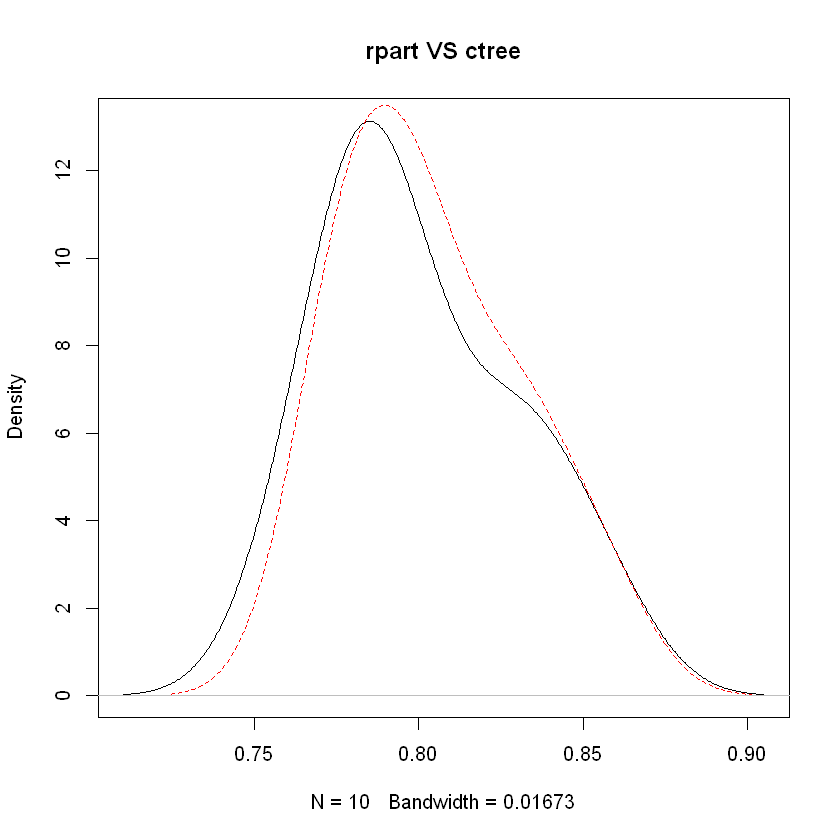

In [44]:
plot(density(rpart_accuracy), main="rpart VS ctree")
lines(density(ctree_accuracy), col = "red", lty = "dashed")

In [48]:
titanic.train[order(titanic.train$ticket),
                  c("ticket", "parch", "name", "cabin", "embarked")]

,ticket,parch,name,cabin,embarked
68,110152,0,"Cherry, Miss. Gladys",B77,S
196,110152,0,"Maioni, Miss. Roberta",B79,S
246,110152,0,"Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)",B77,S
290,110413,2,"Taussig, Miss. Ruth",E68,S
291,110413,1,"Taussig, Mr. Emil",E67,S
75,110465,0,"Clifford, Mr. George Quincy",A14,S
233,110465,0,"Porter, Mr. Walter Chamberlain",C110,S
195,110469,0,"Maguire, Mr. John Edward",C106,S
35,110489,0,"Borebank, Mr. John James",D22,S
30,110564,0,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",C52,S


In [49]:
sum(is.na(titanic.train$ticket))
sum(is.na(titanic.train$embarked))
sum(is.na(titanic.train$cabin))
f$train$type <- "T"
f$validation$type <- "V"

[1] 0

[1] 2

[1] 916

In [50]:
all <- rbind(f$train, f$validation)
ctree_model <- ctree(survived ~ pclass + sex + age + sibsp + parch + fare + embarked, data = f$train)

In [52]:
all$prob <- sapply(predict(ctree_model, type = "prob", newdata = all), function(result) {result[1]})

In [62]:
install.packages("plyr")
library(plyr)

package 'plyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'plyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\plyr\libs\x64\plyr.dll를 C:\ProgramData\Anaconda3\Lib\R\library\plyr\libs\x64\plyr.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'plyr'"


The downloaded binary packages are in
	C:\Users\JMLee\AppData\Local\Temp\RtmpOCDfMO\downloaded_packages


Warning message:
"package 'plyr' was built under R version 3.6.2"
Attaching package: 'plyr'

The following object is masked from 'package:modeltools':

    empty

The following objects are masked from 'package:Hmisc':

    is.discrete, summarize



In [63]:
family_idx <- 0
ticket_based_family_id <- ddply(all, .(ticket), function(rows){
    family_idx <<- family_idx + 1
    return(data.frame(family_id = paste0("TICKET_", family_idx)))
})
str(ticket_based_family_id)
head(ticket_based_family_id)

'data.frame':	860 obs. of  2 variables:
 $ ticket   : chr  "110152" "110413" "110465" "110469" ...
 $ family_id: Factor w/ 860 levels "TICKET_1","TICKET_2",..: 1 2 3 4 5 6 7 8 9 10 ...


ticket,family_id
110152,TICKET_1
110413,TICKET_2
110465,TICKET_3
110469,TICKET_4
110489,TICKET_5
110564,TICKET_6


In [64]:
all <- adply(all,
            1,
            function(row){
                family_id <- NA
                if(!is.na(row$ticket)){
                    family_id <- subset(ticket_based_family_id, ticket == row$ticket)$family_id
                }
                return(data.frame(family_id = family_id))
            })

In [65]:
all <- ddply(all,
            .(family_id),
            function(rows){
                rows$avg_prob <- mean(rows$prob)
                return(rows)
            })

In [71]:
all <- ddply(all, .(family_id), function(rows){
               rows$maybe_parent <- FALSE
               rows$maybe_child <- FALSE
               if(NROW(rows) == 1 ||
                  sum(rows$parch) == 0 ||
                  NROW(rows) == sum(is.na(rows$age))){
                 return(rows)
               }
               max_age <- max(rows$age, na.rm=TRUE)
               min_age <- min(rows$age, na.rm=TRUE)
               return(adply(rows, 1, function(row){
                 if(!is.na(row$age) && !is.na(row$sex)){
                   row$maybe_parent <- (max_age - row$age) < 10
                   row$maybe_chile <- (row$age - min_age) < 10
                 }
                 return(row)
               }))
             })

In [72]:
all <- ddply(all, .(family_id), function(rows){
  rows$avg_parent_prob <- rows$avg_prob
  rows$avg_child_prob <- rows$avg_prob
  if(NROW(rows) == 1 || sum(rows$parch) == 0) {
    return(rows)
  }
  parent_prob <- subset(rows, maybe_parent == TRUE)[, "prob"]
  if(NROW(parent_prob) > 0) {
    rows$avg_parent_prob <- mean(parent_prob)
  }
  child_prob <- subset(rows, maybe_child == TRUE)[, "prob"]
  if(NROW(child_prob) > 0) {
    rows$avg_child_prob <- mean(child_prob)
  }
  return(rows)
})

In [74]:
f$train <- subset(all, type =="T")
f$valication <- subset(all, type =="V")
(m <- ctree(survived ~ pclass + sex + age + sibsp + parch + fare + embarked + maybe_parent
            + maybe_child + avg_prob + avg_parent_prob + avg_child_prob, data = f$train))


	 Conditional inference tree with 8 terminal nodes

Response:  survived 
Inputs:  pclass, sex, age, sibsp, parch, fare, embarked, maybe_parent, maybe_child, avg_prob, avg_parent_prob, avg_child_prob 
Number of observations:  1061 

1) avg_prob <= 0.576093; criterion = 1, statistic = 366.685
  2) sex == {male}; criterion = 1, statistic = 57.566
    3) age <= 13; criterion = 1, statistic = 25.71
      4)*  weights = 24 
    3) age > 13
      5) pclass == {1, 3}; criterion = 0.994, statistic = 15.3
        6)*  weights = 77 
      5) pclass == {2}
        7)*  weights = 28 
  2) sex == {female}
    8) pclass == {3}; criterion = 1, statistic = 59.365
      9)*  weights = 129 
    8) pclass == {1, 2}
      10)*  weights = 198 
1) avg_prob > 0.576093
  11) avg_prob <= 0.75; criterion = 1, statistic = 17.494
    12) sex == {male}; criterion = 0.977, statistic = 9.587
      13)*  weights = 93 
    12) sex == {female}
      14)*  weights = 22 
  11) avg_prob > 0.75
    15)*  weights = 490 